# *DESAFIO 1*

- #### Como primer medida vamos a importar las librerías que vamos a utilizar a lo largo de la notebook, y todas las herramientas que creamos necesarias. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

%matplotlib inline

- #### El siguiente paso es importar el Dataset y comenzar a revisarlo

In [2]:
data_location = 'C:/Users/USUARIO/Desktop/Digital House - DS/Data Sets/properatti.csv'
data = pd.read_csv(data_location)

data_final = data[['property_type','place_name','place_with_parent_names','state_name','price','currency','price_aprox_usd',
                         'surface_total_in_m2','surface_covered_in_m2','price_per_m2','rooms','description','title']].copy()

In [3]:
data_final.dtypes

property_type               object
place_name                  object
place_with_parent_names     object
state_name                  object
price                      float64
currency                    object
price_aprox_usd            float64
surface_total_in_m2        float64
surface_covered_in_m2      float64
price_per_m2               float64
rooms                      float64
description                 object
title                       object
dtype: object

In [4]:
print(data_final.isnull().sum() / data_final.shape[0], '\n')

property_type              0.000000
place_name                 0.000190
place_with_parent_names    0.000000
state_name                 0.000000
price                      0.168372
currency                   0.168380
price_aprox_usd            0.168372
surface_total_in_m2        0.324435
surface_covered_in_m2      0.164222
price_per_m2               0.276869
rooms                      0.609058
description                0.000016
title                      0.000000
dtype: float64 



- #### Miramos si hay valores duplicados. En caso de que los haya, los eliminamos

In [5]:
duplicados = data_final.duplicated()
print(duplicados.shape[0])
print(duplicados.sum())
print('----')

data_final.loc[duplicados].head(40)
data_final.drop_duplicates(inplace=True)

print(data_final.shape[0])

121220
5410
----
115810


In [6]:
data_final.drop_duplicates(inplace=True)
print(data_final.shape[0])

115810


- #### *Investigamos la columna price_aprox_usd*

In [7]:
print('Tamaño columna price --->', data_final['price_aprox_usd'].shape[0], '\n')
print('Valores nulos columna price --->', data_final['price_aprox_usd'].isnull().sum(), '\n')
print('Valores NO nulos columna price --->', data_final['price_aprox_usd'].notnull().sum(), '\n')
print(data_final['price_aprox_usd'].describe(), '\n')

Tamaño columna price ---> 115810 

Valores nulos columna price ---> 17374 

Valores NO nulos columna price ---> 98436 

count    9.843600e+04
mean     2.408911e+05
std      3.938126e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.450000e+05
75%      2.680000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64 



- #### *Investigamos la columna property_type*

In [8]:
data_final['property_type'].value_counts()

apartment    66418
house        39712
PH            5613
store         4067
Name: property_type, dtype: int64

In [9]:
data_final['property_type'].describe()

count        115810
unique            4
top       apartment
freq          66418
Name: property_type, dtype: object

In [68]:
price_aprox_usd = data_final['price_aprox_usd']
property_type_PH = data_final['property_type'] == 'PH' 
PH_price = price_aprox_usd[property_type_PH]

property_type_apartment = data_final['property_type'] == 'apartment' 
apartment_price = price_aprox_usd[property_type_apartment]

property_type_house = data_final['property_type'] == 'house' 
house_price = price_aprox_usd[property_type_house]

property_type_store = data_final['property_type'] == 'store' 
store_price = price_aprox_usd[property_type_store]

In [69]:
print('Cantidad de nulos en PH --->', PH_price.isnull().sum() / PH_price.shape[0] , '\n')
print('Cantidad de nulos en apartment --->', apartment_price.isnull().sum() / apartment_price.shape[0] , '\n')
print('Cantidad de nulos en house --->', house_price.isnull().sum() / house_price.shape[0] , '\n')
print('Cantidad de nulos en store --->', store_price.isnull().sum() / store_price.shape[0] , '\n')

Cantidad de nulos en PH ---> 0.08070550507749866 

Cantidad de nulos en apartment ---> 0.1325694841759764 

Cantidad de nulos en house ---> 0.18289182111200644 

Cantidad de nulos en store ---> 0.20973690681091714 



- #### Cantidad de outliers para PH 

In [12]:
PH_price.describe()

count    5.160000e+03
mean     1.478231e+05
std      1.496184e+05
min      5.047530e+03
25%      8.500000e+04
50%      1.200000e+05
75%      1.650000e+05
max      2.800000e+06
Name: price_aprox_usd, dtype: float64

In [150]:
print(PH_price.shape[0])
print(PH_price.notnull().sum())

price_aprox_usd_ph_alto = PH_price > 165000
cantidad_outliers_ph = price_aprox_usd_ph_alto.sum()
print('Cantidad outliers PH --->', cantidad_outliers_ph)

5613
5613
Cantidad outliers PH ---> 1283


In [154]:
porcentaje_outliers_PH = cantidad_outliers_ph / PH_price.notnull().sum()
print('Porcentaje outliers PH --->', porcentaje_outliers_PH)

Porcentaje outliers PH ---> 0.22857651879565294


- #### Cantidad de outliers para Apartment 

In [15]:
apartment_price.describe()

count    5.761300e+04
mean     1.883107e+05
std      3.189413e+05
min      4.666620e+03
25%      8.000000e+04
50%      1.199000e+05
75%      1.930000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [143]:
print(apartment_price.shape[0])
print(apartment_price.notnull().sum())

price_aprox_usd_apartment_alto = apartment_price > 193000
cantidad_outliers_apartment = price_aprox_usd_apartment_alto.sum()
print('Cantidad outliers apartment --->', cantidad_outliers_apartment)

66418
66418
Cantidad outliers apartment ---> 14394


In [152]:
porcentaje_outliers_apartment = cantidad_outliers_apartment / apartment_price.notnull().sum()
print('Porcentaje outliers Apartment --->', porcentaje_outliers_apartment)

Porcentaje outliers Apartment ---> 0.21671835948086363


- #### Cantidad de outliers para House

In [18]:
house_price.describe()

count    3.244900e+04
mean     3.293453e+05
std      4.587110e+05
min      0.000000e+00
25%      1.400000e+05
50%      2.400000e+05
75%      3.800000e+05
max      2.500000e+07
Name: price_aprox_usd, dtype: float64

In [144]:
print(house_price.shape[0])
print(house_price.notnull().sum())

price_aprox_usd_house_alto = house_price > 380000
cantidad_outliers_house = price_aprox_usd_house_alto.sum()
print('Cantidad outliers house', cantidad_outliers_house)

39712
39712
Cantidad outliers house 8107


In [155]:
porcentaje_outliers_house = cantidad_outliers_house / house_price.notnull().sum()
print('Porcentaje outliers house --->', porcentaje_outliers_house)

Porcentaje outliers house ---> 0.2041448428686543


- #### Cantidad de outliers para Store

In [21]:
store_price.describe()

count    3.214000e+03
mean     4.398016e+05
std      7.644325e+05
min      4.952450e+03
25%      9.500000e+04
50%      2.100000e+05
75%      4.500000e+05
max      1.300000e+07
Name: price_aprox_usd, dtype: float64

In [147]:
print(store_price.shape[0])
print(store_price.notnull().sum())

price_aprox_usd_store_alto = store_price > 450000
cantidad_outliers_store = price_aprox_usd_store_alto.sum()
print('Cantidad de outliers store --->', cantidad_outliers_store)

4067
4067
Cantidad de outliers store ---> 777


In [156]:
porcentaje_outliers_store = cantidad_outliers_store / store_price.notnull().sum()
print('Porcentaje outliers store --->', porcentaje_outliers_store)

Porcentaje outliers store ---> 0.19104991394148021


- #### En el gráfico podemos ver mas claramente la distribución de los precios por tipo de propiedad

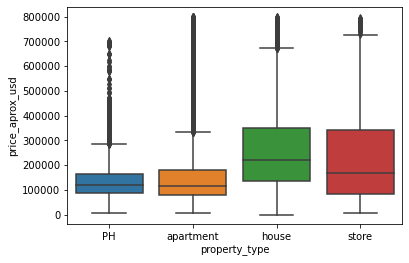

In [148]:
mask = data_final['price_aprox_usd'] < 800000
fig = sns.boxplot(data = data_final.loc[mask,['price_aprox_usd','property_type']], x ='property_type', y = 'price_aprox_usd')

In [165]:
bins = [0,100000,500000,1000000,65000000]

priceusd_categorias = pd.cut(data_final['price_aprox_usd'], bins, right=False, labels=['bajo ---> $0 a $100k','medio --->$100k a $500k','alto ---> $500k to $1MM',
                                                                                'muy alto ---> $1MM to $10MM'], ordered=True)
priceusd_categorias.value_counts()

medio --->$100k a $500k        59676
bajo ---> $0 a $100k           29868
alto ---> $500k to $1MM         6469
muy alto ---> $1MM to $10MM     2423
Name: price_aprox_usd, dtype: int64

- #### Imputación de valores nulos 

In [136]:
data_final['property_type'].value_counts()

apartment    66418
house        39712
PH            5613
store         4067
Name: property_type, dtype: int64

In [137]:
data_final['price_aprox_usd'].isnull().sum()

17374

- #### Imputamos PH

In [157]:
# algunas de estas variable estan definidas mas arriba, pero las escribí acá para poder mostrar el error en la imputación de los datos 

price_aprox_usd = data_final['price_aprox_usd']
property_type_PH = data_final['property_type'] == 'PH' 
PH_price = price_aprox_usd[property_type_PH]

PH_priceusd_mean = PH_price.mean()
PH_priceusd_null_count = PH_price.isnull().sum()
PH_priceusd_notnull_count = PH_price.notnull().sum()

print(PH_priceusd_notnull_count)
print('----')
print(PH_priceusd_null_count)

5160
----
453


In [158]:
# Imputamos los datos 

PH_price.fillna(PH_priceusd_mean, axis=0, inplace=True)

print(PH_price.isnull().sum())

0


In [159]:
data_final['price_aprox_usd'].isnull().sum()

17374

- #### Imputamos Apartment

In [122]:
apartment_priceusd_mean = apartment_price.mean()
apartment_priceusd_null_count = apartment_price.isnull().sum()
apartment_priceusd_notnull_count = apartment_price.notnull().sum()

print(apartment_priceusd_notnull_count)
print('----')
print(apartment_priceusd_null_count)

66418
----
0


In [123]:
# Imputamos los datos 

apartment_price.fillna(apartment_priceusd_mean, axis=0, inplace=True)

print(apartment_price.isnull().sum())

0


In [124]:
data_final['price_aprox_usd'].isnull().sum()

17374

- #### Imputamos House

In [125]:
house_priceusd_mean = house_price.mean()
house_priceusd_null_count = house_price.isnull().sum()
house_priceusd_notnull_count = house_price.notnull().sum()

print(house_priceusd_notnull_count)
print('----')
print(house_priceusd_null_count)

32449
----
7263


In [126]:
# Imputamos los datos 

house_price.fillna(apartment_priceusd_mean, axis=0, inplace=True)

print(house_price.isnull().sum())

0


- #### Imputamos Store

In [130]:
store_priceusd_mean = store_price.mean()
store_priceusd_null_count = store_price.isnull().sum()
store_priceusd_notnull_count = store_price.notnull().sum()

print(store_priceusd_notnull_count)
print('----')
print(store_priceusd_null_count)

3214
----
853


In [131]:
# Imputamos los datos 

store_price.fillna(store_priceusd_mean, axis=0, inplace=True)

print(store_price.isnull().sum())

0


- #### Volvemos a graficar para ver los cambios en los datos luego de la imputación. 

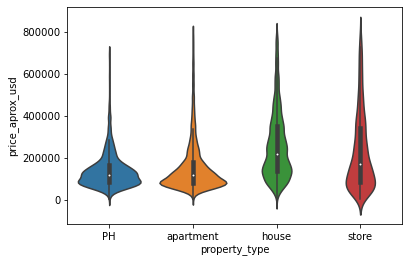

In [98]:
mask = data_final['price_aprox_usd'] < 800000
fig = sns.violinplot(data = data_final.loc[mask,['price_aprox_usd','property_type']], x ='property_type', y = 'price_aprox_usd')

In [99]:
data_final['price_aprox_usd'].isnull().sum()

17374

In [149]:
data_final['property_type'].isnull().sum()

0

In [101]:
nulos = data_final['price_aprox_usd'].isnull()
data_final.loc[nulos]

,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,rooms,description,title
5,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos,NaN,NaN,NaN,53.0,NaN,NaN,NaN,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ..."
20,house,Villa Giardino,|Argentina|Córdoba|Villa Giardino|,Córdoba,NaN,NaN,NaN,148.0,148.0,NaN,NaN,"Consta de: Comedor-cocina, cuatro dormitorios ...","Casa con excelente ubicaciòn, calle asfaltada,..."
41,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Córdoba,NaN,NaN,NaN,115.0,115.0,NaN,4.0,“Arecas” es un complejo de dúplex y departamen...,Venta en pozo deptos-dúplex- Barrio Santa Rita...
62,house,Berazategui,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,156.0,156.0,NaN,NaN,Casa moderna en dos plantas.PB : Living con ho...,MODERNA CASA EN OMBUES DE HUDSON
67,house,Ituzaingó,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,Bs.As. G.B.A. Zona Oeste,NaN,NaN,NaN,220.0,NaN,NaN,5.0,PLANTA ALTA: DORMITORIO EN SUITE - BALCÓNPLANT...,Chalet en Venta. Ambientes. Dormitorios. 220 m2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121210,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,120.0,NaN,NaN,Dos viviendas en block en excelente ubicación ...,Casa - Martinez
121211,apartment,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,205.0,205.0,NaN,NaN,Excelente departamento de categoría con vistas...,Departamento - Acassuso
121212,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,420.0,420.0,NaN,NaN,ESPECTACULAR CASA ESTILO RACIONALISTA EN CALLE...,Casa - Acassuso
121213,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,600.0,600.0,NaN,NaN,EXCELENTE casa en Martinez. Inmejorable ubicai...,Casa - Martinez


- #### *Ahora vamos a comenzar a filtrar la columna price_per_m2*

In [161]:
price_per_m2 = data_final['price_per_m2']

In [162]:
price_per_m2.describe()

count    8.556600e+04
mean     6.807449e+03
std      2.851236e+04
min      1.510204e+00
25%      1.538462e+03
50%      2.200000e+03
75%      3.333333e+03
max      4.000000e+06
Name: price_per_m2, dtype: float64

In [163]:
print('Nulos price_per_m2 --->',price_per_m2.isnull().sum())
print('Valores NO nulos price_per_m2 --->', price_per_m2.notnull().sum())

Nulos price_per_m2 ---> 30244
Valores NO nulos price_per_m2 ---> 85566


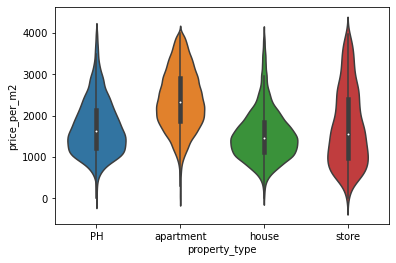

In [164]:
mask_priceperm2 = data_final['price_per_m2'] < 4000
fig = sns.violinplot(data = data_final.loc[mask_priceperm2,['price_per_m2','property_type']], x ='property_type', y = 'price_per_m2')

In [ ]:
bins = [0,1600,2200,3400,4000]

priceusd_categorias = pd.cut(data_final['priceusd'], bins, right=False, labels=['bajo ---> $0 a $1600 per m2','medio --->$1600 a $2200 per m2','alto ---> $2200 a $3400 per m2',
                                                                                'muy alto ---> $3400 a $5000 per m2'], ordered=True)
priceusd_categorias.value_counts()